In [2]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

# Lab 1

When reporting probabilities in a scientific context, the standard is to convert this probabilty into a sigma value, which represents the probabilty of the data To convert sigma values back to a probabilty, some convoluted integration is required. Luckily, python has these capabilites built in. The *erfc* function is one of several scipy functions which returns a probabilty given an input sigma value. 

In [3]:
for x in range(1, 6):
    print(sp.special.erfc(x))

0.15729920705028516
0.004677734981047266
2.2090496998585445e-05
1.541725790028002e-08
1.5374597944280347e-12


Here we can see that *erfc* values roughly match up with the negative 1, 2, 3, and 4 sigma values on a z table (or the positive values subtracted from 1), giving us the probabilty that our target event happened outside of our measured sigma value. As previously mentioned, the accepted standard is to convert this probabilty into a sigma value, but a probabilty can also be converted back into a sigma, as is shown below.

In [4]:
sp.stats.norm.ppf(3e-7)

-4.991217139907698

Here we see the sigma value reported as a negative number. This is probably due to the fact that the built in function uses the left side of the normal distribution to find the associated sigma value as this would come up first when searching from negative to positive.

### Rayleigh Distribution

A Rayliegh distribution is distinct in that it is not identical on each side of its peak. Applications of Rayleigh distributions are most common in places where long-lived or large events are less common than those of shorter length. Examples are wave height or product lifespan. Let's create a sample set of data with built-in Python functions.

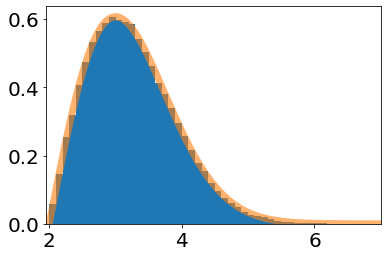

In [5]:
d = sp.stats.rayleigh.rvs(loc = 2.0, scale = 1, size = 100000)

xleft = 1.95
xright = 7

fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 20)
plt.xlim(xleft, xright)
x = np.linspace(xleft,xright,1000)
ax.plot(x, sp.stats.rayleigh.pdf(x,loc = 2, scale = 1),linewidth = 7,alpha = 0.6)
plt.show()

Looks pretty good! The 100,000 sample size seems to have created a pretty accurate distrobution. However, towards the top end (~X = 6), we can't really tell what is going on. The height of the distribution is controlled by the 'scale' factor in the pdf, with a higher scale representing a wider and shorter distribution. Plotting our data on a semilog graph reveals some interesting secrets.

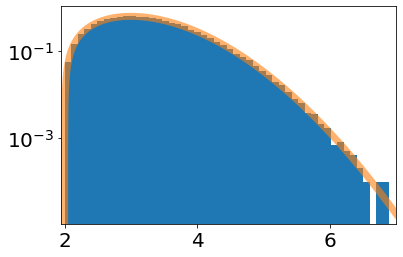

In [6]:

#def prob_graph(loc, scale, xleft, xright, size)

d = sp.stats.rayleigh.rvs(loc = 2.0, scale = 1, size = 100000)

xleft = 1.95
xright = 7

fig, ax = plt.subplots(1, 1)
ax.set_yscale('log')
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 20)
plt.xlim([xleft, xright])
x = np.linspace(xleft,xright,1000)
ax.plot(x,sp.stats.rayleigh.pdf(x,loc = 2, scale = 1),linewidth = 7,alpha = 0.6)
plt.show()

Even with the large sample size, there is a suprisingly large amount of innacuracy towards the tail of the distribution.

The theoretical data above could represent the lifetime of a company's product in years. If a similar, slightly redesigned product has a lifespan of 4.5 years, what is the chance that this is not an improvement over our original product?

In [7]:
sp.stats.rayleigh.cdf(4.5)

0.999959934702607

In [8]:
sp.stats.norm.ppf(0.999959934702607)

3.9440091612702726

This comes out to be a sigma value of 3.94, which while very significant, would not be accepted by the scientific community in a physics-related context.

### Binomial Distribution

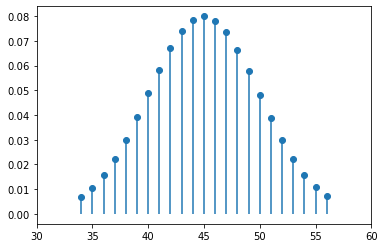

In [9]:
fig, ax = plt.subplots(1,1)
n, p = 100, .45

m, v, s, k = sp.stats.binom.stats(n, p, moments="mvsk")

x = np.arange(sp.stats.binom.ppf(0.01, n, p), sp.stats.binom.ppf(0.99, n, p))
plt.xlim(30, 60)

ax.plot(x, sp.stats.binom.pmf(x, n, p), 'o')

ax.vlines(x, 0, sp.stats.binom.pmf(x, n, p))

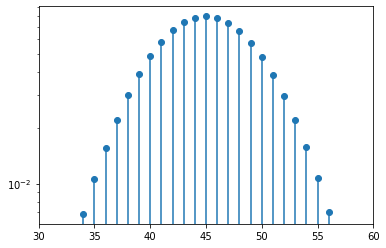

In [10]:
fig, ax = plt.subplots(1,1)
n, p = 100, .45

m, v, s, k = sp.stats.binom.stats(n, p, moments="mvsk")

x = np.arange(sp.stats.binom.ppf(0.01, n, p), sp.stats.binom.ppf(0.99, n, p))
plt.xlim(30, 60)

ax.plot(x, sp.stats.binom.pmf(x, n, p), 'o')
ax.set_yscale('log')
ax.vlines(x, 0, sp.stats.binom.pmf(x, n, p))

In a semilog plot, the distribution takes on the shape of a slightly skewed parabola, looking very similar to, but slightly different from a Gaussian curve.

Using the distrubition above, let's assume we flip a coin that is slightly biased to one side. We'd assume most outcomes would land around 45 on one side to 55 on the other, which is reflected in the graph. One difference in comparison to our previous question, which dealt with a continuous probabilty, is that our probabilty only takes on integer values, which makes the binomial distribution good for counting events if we know the general probability that it should happen. Unlike individual data points, statistics about the binomial distribution don't have to necessarily be an integer value. If the average family has 1.9 kids, that clearly does not mean that any familiy has that exact value.

So what happens if we get 60 heads on a second coin with unknown properties? Could it be the same type of coin?

In [11]:
sp.stats.binom.cdf(60, n, p)

0.9990617681011207

In [12]:
sp.stats.norm.ppf(0.9990617681011207)

3.1091185978008937

Most likely, this coin is different, but there wouldn't be enough results here to publish it in a paper, as once again, the value falls short of the 5-sigma threshold.